In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('C:/Users/amous/Desktop/finalData/voice_bts.csv')

In [2]:
for i in data.columns:
    print(i)

dn
contract_id
profile_id
subprofile
produit
full_vol
full_secteur
full_city


In [3]:
data = data.drop('subprofile', axis=1)  # Features (phone number attributes)
data = data.drop('contract_id', axis=1)  # Features (phone number attributes)

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Step 3: Prepare Data for Clustering
categorical_cols = data.select_dtypes(include=['object']).columns

# Convert categorical columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_cols:
    data[column] = label_encoder.fit_transform(data[column])


# Exclude 'dn' column from clustering
columns_for_clustering = [col for col in data.columns if (col != 'dn')]
X = data[columns_for_clustering].values


In [7]:
import os
import sys
import numpy as np


n_clusters = 3 

# Step 1: Change Directory to the parent directory of 'skmeans'
project_path = 'C:/Users/amous/kkconc'  # Replace with the path to the parent directory
os.chdir(project_path)

# Step 2: Import the SphericalKmeans class
from kkconc.clustering import spherical_kmeans

# Now you can use the SphericalKmeans class
spherical_kmeans_instance = spherical_kmeans.SphericalKmeans(n_clusters=n_clusters)


In [8]:

# Fit the model to your data (X)
spherical_kmeans_instance.fit(X)

# Access the cluster labels assigned to each data point after fitting
cluster_labels = spherical_kmeans_instance.labels_

# Access the criterion obtained from the best run (optional)
criterion = spherical_kmeans_instance.criterion

# Access the sequence of criterion values during the best run (optional)
criterions = spherical_kmeans_instance.criterions

 == New init == 
iteration: 0
38400.260109228104
iteration: 1
41362.573566830826
iteration: 2
41467.44912618561
iteration: 3
41501.76058332662
iteration: 4
41517.75521306284
iteration: 5
41524.63252564279
iteration: 6
41528.29063724894
iteration: 7
41529.847357113526
iteration: 8
41530.63518775781
iteration: 9
41530.98511862232
iteration: 10
41531.22384812995
iteration: 11
41531.398103920146
iteration: 12
41531.51403224314
iteration: 13
41531.59680049252
iteration: 14
41531.67298020886
iteration: 15
41531.69698632478
iteration: 16
41531.70496942171
iteration: 17
41531.707133747856
iteration: 18
41531.71040909991
iteration: 19
41531.7140872594


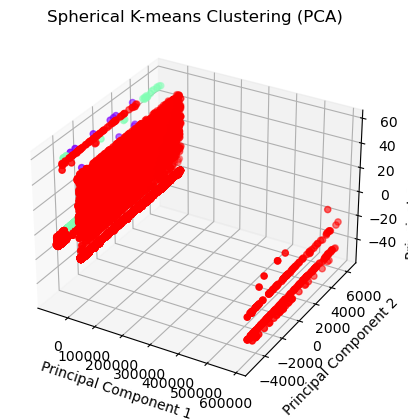

In [9]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



# Assuming 'X' is your data and 'labels_' are the cluster labels obtained from spherical k-means
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=cluster_labels, cmap='rainbow')
ax.set_title('Spherical K-means Clustering (PCA)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()


In [10]:
from sklearn.metrics import silhouette_score

# Step 6: Calculate the Silhouette Score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6084838546551469
